In [190]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
%matplotlib inline

In [125]:
x=np.load("data_x.npy")
y=np.load("data_y.npy")

In [126]:
x.shape,y.shape

((3000, 64, 64, 3), (3000,))

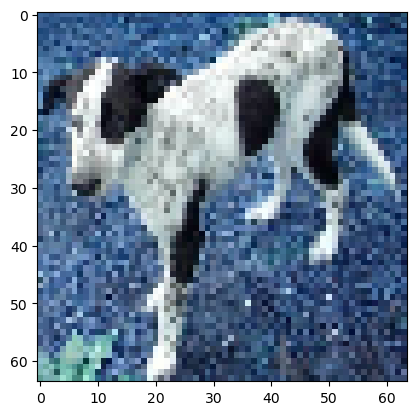

In [127]:
plt.imshow(x[800])

In [128]:
print(y[800]) ## 1 indicates dog and 0 cat

1


In [129]:
index=2200
x_train,x_test,y_train,y_test=x[:index],x[index:],y[:index],y[index:]

In [130]:
x_train.shape,x_test.shape

((2200, 64, 64, 3), (800, 64, 64, 3))

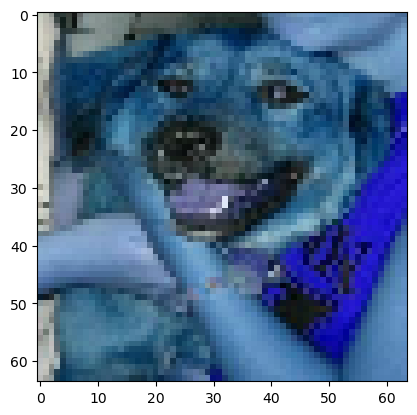

In [131]:
k

 we need to reshape this to (120@120@3,8000) 4d to 2d

In [132]:
x_train_flatten=x_train.reshape(x_train.shape[0],-1).T
x_train.shape,x_train_flatten.shape

((2200, 64, 64, 3), (12288, 2200))

In [133]:
x_test_flatten=x_test.reshape(x_test.shape[0],-1).T
x_test.shape,x_test_flatten.shape

((800, 64, 64, 3), (12288, 800))

In [196]:
def sigmoid(x):
    s=1/(1+np.exp(-x))
    return s

In [197]:
def initialize_weights_zeros(dim):
    w=np.zeros([dim,1])
    b=0.0
    return w,b

In [198]:
def propagate(w, b, X, Y):
    m=X.shape[1]
    s=np.dot(w.T,X)
    Z=sigmoid(s)
   
    cost=(1/m)*(np.sum(-Y*np.log(Z)-(1-Y)*np.log(1-Z)))
    dw=(1/m)*np.dot(X,(Z-Y).T)
    db=(1/m)*np.sum(Z-Y)
    derivative={"dw":dw,"db":db}
    return cost,derivative
    

In [199]:
def optimize_weights(w,b,x,y,learning_rate=0.009,max_iterations=100):
    import copy
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    for i in range(max_iterations):
        cost,derivative=propagate(w,b,x,y)
        dw=derivative["dw"]
        db=derivative["db"]
        w=w-learning_rate*dw
        b=b-learning_rate*db
        if i%50==0:
            costs.append(cost)
        weights = {"w": w,
              "b": b}
    
        derivative = {"dw": dw,
             "db": db}
    
    return weights,derivative,costs
    
    

In [200]:
def predict(w,b,x):
    m=x.shape[1]
    Y_prediction=np.zeros((1,m))
    w = w.reshape(x.shape[0], 1)
    s=np.dot(w.T,x)
   # print(s)
    z=sigmoid(s)
    #z=1/(1+np.exp(-(np.dot(w.T,x)+b)))
    #print(z)
    for i in range(z.shape[1]):
        if z[0, i] > 0.5 :
            Y_prediction[0,i] =1 
        else:
             Y_prediction[0,i] = 0
    return Y_prediction

In [201]:
def model(X_train, X_test, Y_train, Y_test, num_iterations, learning_rate, print_cost):
    dim=X_train.shape[0]
    w,b=initialize_weights_zeros(dim)
    print(X_train.shape)
    weights,derivative,costs=optimize_weights(w,b,X_train,Y_train,learning_rate,num_iterations)
    w,b=weights["w"],weights["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train =predict(w, b, X_train)
    accuracy_train=100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    accuracy_test=100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    if print_cost:
        print("train accuracy: {} %".format(accuracy_train))
        print("test accuracy: {} %".format(accuracy_test))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
        "accuracy_test":accuracy_test,
         "accuracy_train":accuracy_train
        }
    return d

## calculate accuracy and cost function with 3000 samplings

In [63]:
result={}
k=0
for i in [2000,4000,6000]:
    for j in [0.01,0.005,0.001]:
        k+=1
        re=logistic_regression_model=model(x_train_flatten,x_test_flatten,y_train,y_test, num_iterations=i, learning_rate=j, print_cost=True)
        result[k]={
            "costs":re["costs"][-1],
            "learning_rate":j,
            "number of iterations": i,
            "accuracy_test":re["accuracy_test"],
            "accuracy_train":re["accuracy_train"]
        }

(12288, 2200)
train accuracy: 55.45454545454545 %
test accuracy: 53.75 %
(12288, 2200)
train accuracy: 55.22727272727273 %
test accuracy: 53.125 %
(12288, 2200)
train accuracy: 67.9090909090909 %
test accuracy: 58.375 %
(12288, 2200)
train accuracy: 58.77272727272727 %
test accuracy: 53.875 %
(12288, 2200)
train accuracy: 60.22727272727273 %
test accuracy: 54.375 %
(12288, 2200)
train accuracy: 71.81818181818181 %
test accuracy: 59.125 %
(12288, 2200)
train accuracy: 62.36363636363637 %
test accuracy: 54.375 %
(12288, 2200)
train accuracy: 65.18181818181819 %
test accuracy: 56.125 %
(12288, 2200)
train accuracy: 73.81818181818181 %
test accuracy: 60.0 %


In [110]:
df=pd.DataFrame(result).T
df=df.groupby(["number of iterations","learning_rate"]).sum()
df

costs  accuracy_test  accuracy_train
number of iterations learning_rate                                         
2000.0               0.001          0.622309         58.375       67.909091
                     0.005          0.993564         53.125       55.227273
                     0.010          2.025136         53.750       55.454545
4000.0               0.001          0.591458         59.125       71.818182
                     0.005          0.817401         54.375       60.227273
                     0.010          1.678066         53.875       58.772727
6000.0               0.001          0.567393         60.000       73.818182
                     0.005          0.680462         56.125       65.181818
                     0.010          1.401928         54.375       62.363636

In [64]:

logistic_regression_model=model(x_train_flatten,x_test_flatten,y_train,y_test, num_iterations=50, learning_rate=0.001, print_cost=True)

(12288, 2200)
train accuracy: 59.72727272727273 %
test accuracy: 58.125 %


In [59]:
logistic_regression_model["costs"][0]

0.6931471805599453

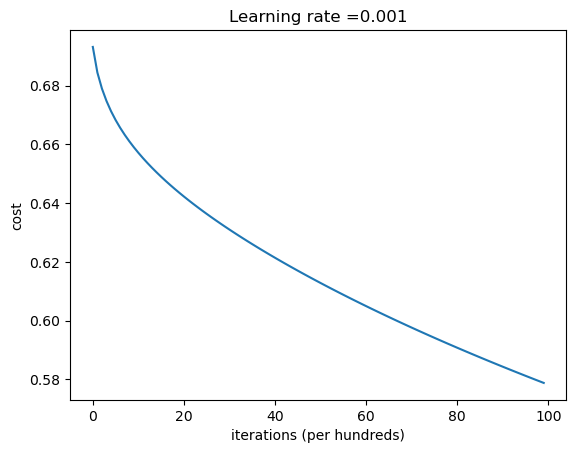

In [78]:
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

## calculate accuracy and cost function with 500 samplings

In [137]:
x_500=np.load("data_x_500.npy")
y_500=np.load("data_y_500.npy")
x_500.shape,y_500.shape

((500, 64, 64, 3), (500,))

In [140]:
index=400
x_train_500,x_test_500,y_train_500,y_test_500=x_500[:index],x_500[index:],y_500[:index],y_500[index:]
x_train_500.shape,y_train_500.shape

((400, 64, 64, 3), (400,))

In [141]:
x_train_flatten_500=x_train_500.reshape(x_train_500.shape[0],-1).T
x_test_flatten_500=x_test_500.reshape(x_test_500.shape[0],-1).T

x_test_flatten_500.shape,x_train_flatten_500.shape

((12288, 100), (12288, 400))

In [89]:
result_500={}
k=0
for i in [2000,4000,6000]:
    for j in [0.01,0.005,0.001]:
        k+=1
        re=logistic_regression_model=model(x_train_flatten_500,x_test_flatten_500,y_train_500,y_test_500, num_iterations=i, learning_rate=j, print_cost=True)
        result_500[k]={
            "costs":re["costs"][-1],
            "learning_rate":j,
            "number of iterations": i,
            "accuracy_test":re["accuracy_test"],
            "accuracy_train":re["accuracy_train"]
        }

(12288, 400)
train accuracy: 98.75 %
test accuracy: 47.0 %
(12288, 400)
train accuracy: 96.75 %
test accuracy: 49.0 %
(12288, 400)
train accuracy: 86.25 %
test accuracy: 49.0 %
(12288, 400)
train accuracy: 100.0 %
test accuracy: 50.0 %
(12288, 400)
train accuracy: 99.75 %
test accuracy: 49.0 %
(12288, 400)
train accuracy: 90.25 %
test accuracy: 51.0 %
(12288, 400)
train accuracy: 100.0 %
test accuracy: 52.0 %
(12288, 400)
train accuracy: 100.0 %
test accuracy: 49.0 %
(12288, 400)
train accuracy: 94.5 %
test accuracy: 51.0 %


In [111]:
df_500=pd.DataFrame(result_500).T
df_500=df_500.groupby(["number of iterations","learning_rate"]).sum()
df_500

costs  accuracy_test  accuracy_train
number of iterations learning_rate                                         
2000.0               0.001          0.468058           49.0           86.25
                     0.005          0.231372           49.0           96.75
                     0.010          0.112583           47.0           98.75
4000.0               0.001          0.377515           51.0           90.25
                     0.005          0.147445           49.0           99.75
                     0.010          0.066225           50.0          100.00
6000.0               0.001          0.318492           51.0           94.50
                     0.005          0.107121           49.0          100.00
                     0.010          0.048205           52.0          100.00

## calculate accuracy and cost function with 1000 samplings

In [192]:
x_1000=np.load("dogs-vs-cats/data/data_x_1000.npy")
y_1000=np.load("dogs-vs-cats/data/data_y_1000.npy")
x_1000.shape

(1000, 64, 64, 3)

In [193]:
index=800
x_train_1000,x_test_1000,y_train_1000,y_test_1000=x_1000[:index],x_1000[index:],y_1000[:index],y_1000[index:]
x_train_1000.shape

(800, 64, 64, 3)

In [194]:
x_train_flatten_1000=x_train_1000.reshape(x_train_1000.shape[0],-1).T
x_test_flatten_1000=x_test_1000.reshape(x_test_1000.shape[0],-1).T

x_test_flatten_1000.shape,x_train_flatten_1000.shape

((12288, 200), (12288, 800))

In [202]:
result_1000={}
k=0
for i in [2000,4000,6000]:
    for j in [0.01,0.005,0.001]:
        k+=1
        re=logistic_regression_model=model(x_train_flatten_1000,x_test_flatten_1000,y_train_1000,y_test_1000, num_iterations=i, learning_rate=j, print_cost=True)
        result_1000[k]={
            "costs":re["costs"][-1],
            "learning_rate":j,
            "number of iterations": i,
            "accuracy_test":re["accuracy_test"],
            "accuracy_train":re["accuracy_train"]
        }

(12288, 800)
train accuracy: 63.375 %
test accuracy: 54.0 %
(12288, 800)
train accuracy: 67.625 %
test accuracy: 54.0 %
(12288, 800)
train accuracy: 77.125 %
test accuracy: 60.5 %
(12288, 800)
train accuracy: 60.375 %
test accuracy: 50.5 %
(12288, 800)
train accuracy: 94.875 %
test accuracy: 59.5 %
(12288, 800)
train accuracy: 82.875 %
test accuracy: 61.5 %
(12288, 800)
train accuracy: 99.25 %
test accuracy: 58.5 %
(12288, 800)
train accuracy: 98.0 %
test accuracy: 58.5 %
(12288, 800)
train accuracy: 87.0 %
test accuracy: 64.0 %


In [206]:
df_1000=pd.DataFrame(result_1000).T
df_1000=df_1000.groupby(["number of iterations","learning_rate"]).sum()
df_1000

costs  accuracy_test  accuracy_train
number of iterations learning_rate                                         
2000.0               0.001          0.558888           60.5          77.125
                     0.005          0.591684           54.0          67.625
                     0.010          1.124723           54.0          63.375
4000.0               0.001          0.496041           61.5          82.875
                     0.005          0.267241           59.5          94.875
                     0.010          0.159199           50.5          60.375
6000.0               0.001          0.449582           64.0          87.000
                     0.005          0.214867           58.5          98.000
                     0.010          0.103609           58.5          99.250

In [208]:
df_class=pd.concat([df_1000.drop("costs",axis=1),df_1000.drop("costs",axis=1),df.drop("costs",axis=1)],axis=1,keys=["500 m","1000 m","3000 m"])


## prediction categories with logistic regression 

In [159]:
from sklearn.linear_model import LogisticRegression
model_500=LogisticRegression(max_iter=6000,tol=0.001)
model_500.fit(x_train_flatten_500.T,y_train_500)
score_500=model_500.score(x_test_flatten_500.T,y_test_500)
score_500

0.51

In [160]:
model_1000=LogisticRegression(max_iter=6000)
model_1000.fit(x_train_flatten_1000.T,y_train_1000)
score_1000=model_1000.score(x_test_flatten_1000.T,y_test_1000)
score_1000

0.56

In [161]:
model_3000=LogisticRegression(max_iter=6000)
model_3000.fit(x_train_flatten.T,y_train)
score_3000=model_3000.score(x_test_flatten.T,y_test)
score_3000

0.5375

In [167]:
from sklearn.model_selection import GridSearchCV

clf_500= GridSearchCV(LogisticRegression(solver='liblinear',multi_class='auto'), {
    'max_iter': [2000,4000,6000],
    'tol': [0.01,0.005,0.001]
}, cv=5, return_train_score=False)
clf_500.fit(x_train_flatten_500.T,y_train_500)
pd.DataFrame(clf_500.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.930209,0.054024,0.002550,0.000050,2000,0.01,"{'max_iter': 2000, 'tol': 0.01}",0.5625,0.5625,0.5125,0.5500,0.5375,0.545,0.018708,4
1,0.936180,0.065183,0.002738,0.000364,2000,0.005,"{'max_iter': 2000, 'tol': 0.005}",0.5625,0.5625,0.5125,0.5500,0.5375,0.545,0.018708,4
2,1.209352,0.111449,0.002555,0.000036,2000,0.001,"{'max_iter': 2000, 'tol': 0.001}",0.5625,0.5625,0.5125,0.5625,0.5500,0.550,0.019365,1
3,1.096800,0.062043,0.003572,0.001020,4000,0.01,"{'max_iter': 4000, 'tol': 0.01}",0.5625,0.5625,0.5125,0.5500,0.5375,0.545,0.018708,4
4,0.942052,0.095018,0.002567,0.000039,4000,0.005,"{'max_iter': 4000, 'tol': 0.005}",0.5625,0.5625,0.5125,0.5500,0.5375,0.545,0.018708,4
5,1.329708,0.089467,0.002742,0.000403,4000,0.001,"{'max_iter': 4000, 'tol': 0.001}",0.5625,0.5625,0.5125,0.5625,0.5500,0.550,0.019365,1
6,0.971120,0.073595,0.002553,0.000043,6000,0.01,"{'max_iter': 6000, 'tol': 0.01}",0.5625,0.5625,0.5125,0.5500,0.5375,0.545,0.018708,4
7,1.054297,0.079655,0.002954,0.000697,6000,0.005,"{'max_iter': 6000, 'tol': 0.005}",0.5625,0.5625,0.5125,0.5500,0.5375,0.545,0.018708,4
8,1.226062,0.083369,0.002620,0.000121,6000,0.001,"{'max_iter': 6000, 'tol': 0.001}",0.5625,0.5625,0.5125,0.5625,0.5500,0.550,0.019365,1


In [168]:
clf_500.best_params_

{'max_iter': 2000, 'tol': 0.001}

In [169]:
clf_500.best_score_

0.55

In [170]:
clf_1000= GridSearchCV(LogisticRegression(solver='liblinear',multi_class='auto'), {
    'max_iter': [2000,4000,6000],
    'tol': [0.01,0.005,0.001]
}, cv=5, return_train_score=False)
clf_1000.fit(x_train_flatten_1000.T,y_train_1000)
pd.DataFrame(clf_1000.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.527526,0.149674,0.004536,0.000221,2000,0.01,"{'max_iter': 2000, 'tol': 0.01}",0.51875,0.54375,0.53125,0.58125,0.5625,0.54750,0.022220,4
1,2.503704,0.115976,0.004363,0.000025,2000,0.005,"{'max_iter': 2000, 'tol': 0.005}",0.51875,0.54375,0.53125,0.58125,0.5625,0.54750,0.022220,4
2,3.124867,0.139498,0.004437,0.000140,2000,0.001,"{'max_iter': 2000, 'tol': 0.001}",0.52500,0.54375,0.53125,0.58125,0.5625,0.54875,0.020691,1
3,2.431418,0.104576,0.004390,0.000033,4000,0.01,"{'max_iter': 4000, 'tol': 0.01}",0.51875,0.54375,0.53125,0.58125,0.5625,0.54750,0.022220,4
4,2.446750,0.115064,0.004508,0.000200,4000,0.005,"{'max_iter': 4000, 'tol': 0.005}",0.51875,0.54375,0.53125,0.58125,0.5625,0.54750,0.022220,4
5,3.192303,0.159980,0.004640,0.000548,4000,0.001,"{'max_iter': 4000, 'tol': 0.001}",0.52500,0.54375,0.53125,0.58125,0.5625,0.54875,0.020691,1
6,2.452252,0.111550,0.004381,0.000031,6000,0.01,"{'max_iter': 6000, 'tol': 0.01}",0.51875,0.54375,0.53125,0.58125,0.5625,0.54750,0.022220,4
7,2.450397,0.111537,0.004370,0.000031,6000,0.005,"{'max_iter': 6000, 'tol': 0.005}",0.51875,0.54375,0.53125,0.58125,0.5625,0.54750,0.022220,4
8,3.247789,0.182374,0.004406,0.000064,6000,0.001,"{'max_iter': 6000, 'tol': 0.001}",0.52500,0.54375,0.53125,0.58125,0.5625,0.54875,0.020691,1


In [171]:
clf_1000.best_score_

0.5487500000000001

In [173]:
clf_1000.best_params_

{'max_iter': 2000, 'tol': 0.001}

In [175]:
clf_3000= GridSearchCV(LogisticRegression(solver='liblinear',multi_class='auto'), {
    'max_iter': [2000,4000,6000],
    'tol': [0.01,0.005,0.001]
}, cv=5, return_train_score=False)
clf_3000.fit(x_train_flatten.T,y_train)
pd.DataFrame(clf_3000.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,13.939834,0.792426,0.011563,0.001108,2000,0.01,"{'max_iter': 2000, 'tol': 0.01}",0.570455,0.527273,0.55,0.554545,0.572727,0.555,0.016414,4
1,13.966912,0.791497,0.011476,0.001793,2000,0.005,"{'max_iter': 2000, 'tol': 0.005}",0.570455,0.527273,0.55,0.554545,0.572727,0.555,0.016414,4
2,16.924920,0.693096,0.010463,0.000058,2000,0.001,"{'max_iter': 2000, 'tol': 0.001}",0.570455,0.527273,0.55,0.559091,0.568182,0.555,0.015641,1
3,13.214975,0.660320,0.010375,0.000129,4000,0.01,"{'max_iter': 4000, 'tol': 0.01}",0.570455,0.527273,0.55,0.554545,0.572727,0.555,0.016414,4
4,13.287627,0.661153,0.010699,0.000488,4000,0.005,"{'max_iter': 4000, 'tol': 0.005}",0.570455,0.527273,0.55,0.554545,0.572727,0.555,0.016414,4
5,16.469296,0.555767,0.010331,0.000088,4000,0.001,"{'max_iter': 4000, 'tol': 0.001}",0.570455,0.527273,0.55,0.559091,0.568182,0.555,0.015641,1
6,13.280676,0.674313,0.010363,0.000137,6000,0.01,"{'max_iter': 6000, 'tol': 0.01}",0.570455,0.527273,0.55,0.554545,0.572727,0.555,0.016414,4
7,13.231786,0.647957,0.010403,0.000090,6000,0.005,"{'max_iter': 6000, 'tol': 0.005}",0.570455,0.527273,0.55,0.554545,0.572727,0.555,0.016414,4
8,16.360087,0.558162,0.010251,0.000026,6000,0.001,"{'max_iter': 6000, 'tol': 0.001}",0.570455,0.527273,0.55,0.559091,0.568182,0.555,0.015641,1


## best result and parameters with logistic regression

In [177]:
score={}
score["500 samples"]={"best_score":clf_500.best_score_,"best parameter":clf_500.best_params_}
score["1000 samples"]={"best_score":clf_1000.best_score_,"best parameter":clf_1000.best_params_}
score["3000 samples"]={"best_score":clf_3000.best_score_,"best parameter":clf_3000.best_params_}
pd.DataFrame(score)

,500 samples,1000 samples,3000 samples
best_score,0.55,0.54875,0.555
best parameter,"{'max_iter': 2000, 'tol': 0.001}","{'max_iter': 2000, 'tol': 0.001}","{'max_iter': 2000, 'tol': 0.001}"


In [182]:
best_model=LogisticRegression(max_iter=2000,tol=0.001)
best_model.fit(x_train_flatten_1000.T,y_train_1000)
best_model.score(x_test_flatten_1000.T,y_test_1000)

0.56

In [186]:
y_pred=best_model.predict(x_test_flatten_1000.T)
accuracy_test=100 - np.mean(np.abs(y_pred - y_test_1000)) * 100
accuracy_test

56.0

In [189]:
y_pre_train=best_model.predict(x_train_flatten_1000.T)
accuracy_train=100 - np.mean(np.abs(y_pre_train - y_train_1000)) * 100
accuracy_train

100.0

## result for different sample with own created algorithms

In [179]:
df_class

500 m                       1000 m  \
                                   accuracy_test accuracy_train accuracy_test   
number of iterations learning_rate                                              
2000.0               0.001                  49.0          86.25          60.5   
                     0.005                  49.0          96.75          54.0   
                     0.010                  47.0          98.75          54.0   
4000.0               0.001                  51.0          90.25          61.5   
                     0.005                  49.0          99.75          59.5   
                     0.010                  50.0         100.00          50.5   
6000.0               0.001                  51.0          94.50          64.0   
                     0.005                  49.0         100.00          58.5   
                     0.010                  52.0         100.00          58.5   

                                                         3000 m                 
                                   accuracy_train accuracy_test accuracy_train  
number of iterations learning_rate                                              
2000.0               0.001                 77.125        58.375      67.909091  
                     0.005                 67.625        53.125      55.227273  
                     0.010                 63.375        53.750      55.454545  
4000.0               0.001                 82.875        59.125      71.818182  
                     0.005                 94.875        54.375      60.227273  
                     0.010                 60.375        53.875      58.772727  
6000.0               0.001                 87.000        60.000      73.818182  
                     0.005                 98.000        56.125      65.181818  
                     0.010                 99.250        54.375      62.363636

### the best resutl is for 6000 iterations and 0.001 learning rate 0.001 is 0.64